In [1]:
%matplotlib inline
from matplotlib import rcParams

In [2]:
import pandas as pd
import matplotlib.pyplot as plt

# Introduction to clustering

Clustering is a machine learning technique used to group unlabeled datapoints in groups called *clusters*. The grouping is done such that similar items are together in the same cluster and items in different clusters are dissimilar from each-other. Typically similarity is defined using a distance measure (Euclidean, cosine, etc). Common practical applications for clustering include: market segmentation, social network analysis, search result grouping, anomaly detection etc.


Two clustering methods will be explored in this notebook:

- K-means.
- Hierarchical clustering.

More methods can be found [here](https://scikit-learn.org/stable/modules/classes.html?highlight=cluster#module-sklearn.cluster).

#### To begin with
Get familiar with how clustering works by watching the videos in Resources A and reading the article in Resources B.


#### Resources: 

* A. Introduction to clustering:
    * https://www.youtube.com/watch?v=4cxVDUybHrI
    
    
* B. A Comprehensive Survey of Clustering Algorithms
    * https://link.springer.com/article/10.1007/s40745-015-0040-1 (Read everything until the section Traditional Clustering Algorithms. From the section Traditional Clustering Algorithms, read the first 2 subsections. You can skip Modern Traditional Clustering Algorithms.)



* C. K-means clustering:
     * https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
     
     * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)
     
     
* D. Hierarchical clustering:
    * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
    * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
    * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering 

### Subject comprehension 

To check your understanding, before moving further, answer the questions in your own words in the space below.

1. What is clustering?
2. What are the main steps in the standard process of clustering?
3. What is the Silhouette coefficient?
4. What are the two types of evaluation for a clustering algorithm and what is the difference between them?

#### <font color='plum'> 1. défintion du clustering </font>
Le clustering est un **apprentissage non supervisé** pas de vérité terrain en face = pas de y.                                                                      
On essaye de faire des groupes, mais pas une vérité qui nous dit quels groupes existent ou pas.              
Plusieurs méthodes : la plus utilisée est le Kmeans , et parfois la classification hierarchique.       
Les autres : plus pour non linéaire. et plus longues à tourner ! On commence par le Kmeans, et ensuite on augmente la complexité des algo (gaussian et cie par exemple )         
<font color= 'mediumorchid'> **Objectif du clustering : faire des groupes** </font> --> **groupes homogènes**, très peu de variance au sein du groupes mais beaucoup de variances entre les groupes !            
<font color=red> **On veut des groupes distincts mais homogènes.** </font>

#### <font color='plum'> 2. Etapes d'un clustering </font>
1. **nettoyage et extractions des données**, et des features 
2. utiliser un **algorithm de clustering**, souvent le Kmeans pour commencer en fixant le nombre de clusters qu'on souhaite
3. **evaluer le modèle**de clustering en utilisant le **silouhette score**, et les représentations graphiques de types ACP ou TNSE 
4. **Expliquer les groupes** : on veut pouvoir interpréter/expliquer les groupes. Les groupes doivent faire sens par rapport à la problématiques données (*ex : des profils clients (acheteurs compulsifs, les llongs à se décider, les pas chers et cie)*)

#### <font color='plum'> 3. Le silhouette score/coefficient </font>


Métrique qui fait un **ratio entre la variance inter et intra groupe**.          
It measures how similar an object is to its own cluster compared to other clusters                        
* Plus le silhouette score est grand, plus beau est le clustering
* On veut le score le plus **proche de 1**.
    * +1 indicates that the sample is far away from the neighboring clusters and very close to the cluster it is assigned to. 
    * 0 indicates that the sample is on or very close to the decision boundary between two neighboring clusters. 
    * -1 indicates that the sample might have been assigned to the wrong cluster, as it is closer to a neighboring cluster than to the cluster it is assigned to.
* pour fixer le nombre de clusters, on utilise le silouhette score --> **on plot le SC en fonction du nombre de clusters** : **le point d'inflexion** vers le bas correspond au meilleur nombre de clusters (il peut y a voir plusieurs points d'inflexions, auquel cas il faut décider en fonction de l'interpréation des clusters)                

Une fois qu'on a décidé du nombre de cluster, on peut faire le graph des silouhettes. 
* 1 couleur = 1 groupe 
* la largeur des morceaux représente la taille des groupes 
* chaque ligne = 1 individu avec son coeff du silhouette score 
* plus le coeff du SC est grand, plus l'individu est bien positionné dans son groupe 
* on a un noyau central avec les individus les mieux positionés = structure du groupe , et autour, les autres, un peu moins raccord. 
* on peut avoir des valeurs négatives: pas la place dans ce groupe mais pas leur place dans aucun groupe. Donc soit on esaye d'augmenter les cluesters soit tant pis pour ces individus... 

#### <font color='plum'> 4. Evaluation d'un algorithm de clustering </font>
Comment évaluer *"the “goodness” of the resulting clusters"* ? 

Pour cela, il faut : 
* comparer les algorithms de clustering 
* comparer des jeux de clusters 
* comparer deux clusters, i.e. en terme de compact et de connectivité 
* de vérifier s'il existe ou non des structures aléatoires dê au bruit 

Il existe 3 catégories: 
* les <font color= 'coral'> **indicateurs internes** </font>: évaluer sur la base des données elles-mêmes
    * <font color='coral'> **Davies–Bouldin indicator** </font>: validation du clustering évaluée avec les quantités et caractéristiques inhérentes à l'ensembles des données.  It measures the average similarity ratio of each cluster with its most similar cluster, taking into account both intra-cluster similarity (compactness) and inter-cluster difference (separation). 
        * plus le DB est faible, meilleur est le clustering 
        * n'implique pas forcément la meilleure recherche d'information 
    * <font color='coral'> **Dunn indicator** </font>: identifie la compacité des clusters --> faible variance entre samples d'un groupe. La moyenne des différents cluster doit être suffisemment éloignées par rapport à la variance au sein d'un cluster.                       
        * Plus le Dunn indicator est haut, meilleur est le cluster.     
        * nb de cluster qui maximise le Dunn indicator = nb optimal de clusters
    * et ainsi de suite : Calinski-Harabasz Index, Within-Cluster Sum of Squares...           
* les <font color= 'mediumturquoise'>**indicateurs externes**</font>: évaluer sur la base d'un résultat connu (étiquette de classe) : when you propose a new clustering technique and you want to validate it or you want to compare it to existing techniques.
    * <font color='mediumturquoise'> **ARI Adjusted Rand Index** </font>: vérifie que deux groupes de clusters sont similaires (un peu comme un coeff de corrélation)
        * 1: Perfect agreement between the two clusterings (the predicted clustering is exactly the same as the true clustering).
        * 0: The clustering is no better than random assignment.
        Negative values: The clustering is worse than random assignment, indicating significant disagreement between the two clusterings.
    * <font color='mediumturquoise'> **Fowlkes-Mallows Index** </font>

* les <font color= 'green'> **indicateurs relatifs**</font> : évaluer en faisant varier les différents paramètres (de type <font color= 'green'> **silhouette score** </font>)


[Source](https://www.geeksforgeeks.org/machine-learning/dunn-index-and-db-index-cluster-validity-indices-set-1/)
[Source2](https://medium.com/@a.cervantes2012/interpreting-and-validating-clustering-results-with-k-means-e98227183a4d)

### Data acquisition

Load the data about bank clients from the *bank-full.csv* file into a pandas dataframe. Make the necessary imports.

In [3]:
# code here
file_path = '../data/bank-full.csv'

df_bank= pd.read_csv( file_path, sep=';', header=0)


Print a summary of the data as well as the first 5 rows.

In [4]:
df_bank.head(5)

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
df_bank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
df_bank = df_bank.drop(index=29182)
#valeur aberrante sur la pdays	

### Preprocessing

To facilitate the computation of distances, keep only the numerical features in the dataset.

- Remove all non-numerical features, as well as the features related to the date.
- Make sure there are no missing values - if they exist, remove them.
- Normalize the new dataset (transform the data for multiple features to the same scale).
- Save the result in a dataframe *df_norm*

In [7]:
# code here
df_norm = df_bank.select_dtypes(include= 'number').drop(columns=['day']).dropna()

In [8]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
data_scaled = scaler.fit_transform(df_norm)
df_norm = pd.DataFrame(data_scaled, columns=df_norm.columns)

In [9]:
df_norm.sample(10)

,age,balance,duration,campaign,pdays,previous
15139,-0.653205,-0.444465,1.540958,-0.569350,-0.411422,-0.300986
18389,-0.559032,-0.419175,-0.505426,-0.246563,-0.411422,-0.300986
18891,0.382697,-0.102238,-0.629685,-0.569350,-0.411422,-0.300986
39649,-1.500762,-0.149861,-0.020041,-0.569350,-0.411422,-0.300986
42815,0.947735,0.113542,-0.645217,0.076224,-0.411422,-0.300986
43698,-0.370686,0.533608,-0.163715,-0.569350,0.467494,4.940361
20271,1.136081,-0.447421,1.358453,-0.246563,-0.411422,-0.300986
39346,-1.594935,-0.911825,-0.338454,-0.246563,-0.411422,-0.300986
18556,-0.559032,0.121096,0.399332,0.399011,-0.411422,-0.300986
27549,-0.370686,-0.328200,-0.851020,0.399011,1.416324,1.271418


Plot histograms of features

array([[<Axes: title={'center': 'age'}>,
        <Axes: title={'center': 'balance'}>],
       [<Axes: title={'center': 'duration'}>,
        <Axes: title={'center': 'campaign'}>],
       [<Axes: title={'center': 'pdays'}>,
        <Axes: title={'center': 'previous'}>]], dtype=object)

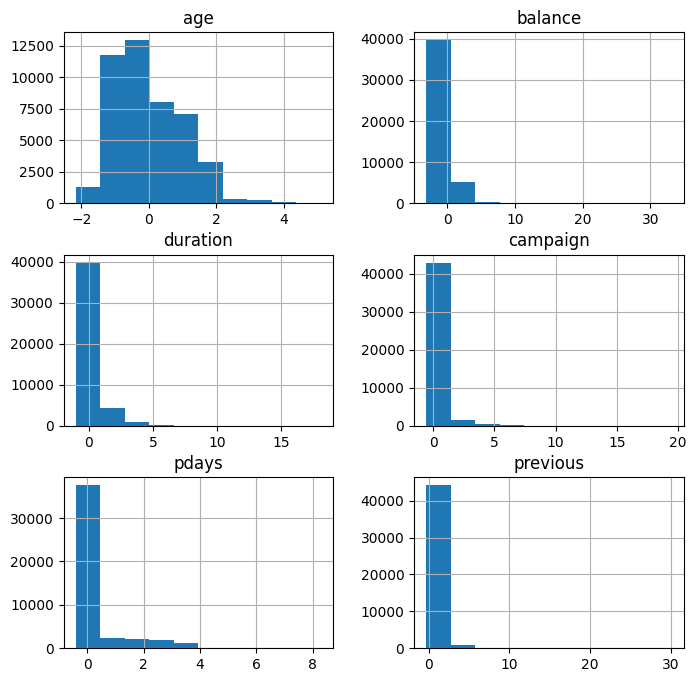

In [10]:
df_norm.hist(figsize=(8,8))

## KMeans


Let's warm up with the well known algorithm named KMeans!

Centroid-based clustering organizes the data into non-hierarchical clusters, contrarily to hierarchical clustering. KMeans is the most widely-used centroid-based clustering algorithm. Centroid-based algorithms are efficient but sensitive to initial conditions and outliers. 


To better understand the way the algorithm works, read the documents and watch the video in Resources C:
* https://stanford.edu/~cpiech/cs221/handouts/kmeans.html
* https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (up to minute 11:34)


Then answer the below questions (in your own words):
1. What is a centroid?
2. How can you compute a centroid?
3. Are you supposed to know in advance the number of clusters in order to use the KMeans algorithm?


1. <font color='mediumorchid'> **Centroid** </font>: c'est le centre du cluster. Un point est concidéré comme étant dans un cluster s'il est plus proche du centroïd du cluster que d'un autre. 

2.  <font color='mediumorchid'> **Compute a centroid** </font> : 
    1. Dans le K-means, l'algo place un nombre de centroid (=nb de clusters choisis) au hasard
    2. il assigne les points les plus proches à son centroid 
    3. Cela  donne un cluster: le centroid est déplacé au centre du cluster
    4. il réassigne les points les plus proches à son centroid
    5. cela donne un cluser : le ccentroid est redépalcé au centre du cluster
    6. et ainsi de suite en fonction du nombre de clusters choisis 

3. <font color='mediumorchid'> **Number of clusters** </font> On ne connait pas à l'avance le nombre de cluster : c'est là qu'on utilise la silhouette score ou l'intertie pour plotter en fonction du nombres de clusters --> **le point d'inflexion représente le nombre optimal de clusters**

#### Make the necessary imports from scikit learn in order to perform KMeans clustering

In [11]:
from sklearn.cluster import KMeans

#### Exploring KMeans with sklearn

The goal of this step is to become familiar with the sklearn clustering package and the silhouette analysis concepts.

Start by peforming a clustering of the data in *df_norm* into 5 clusters.

In [12]:
kmeans = KMeans(n_clusters=5, random_state=42).fit(df_norm)

Print the centroids obtained

In [13]:
centroids = kmeans.cluster_centers_
centroids


array([[-6.46495266e-01, -1.50387974e-01, -2.22051542e-01,
        -1.57333642e-01, -3.74289183e-01, -2.67931050e-01],
       [-1.23097169e-01,  3.87913567e-03, -8.66726172e-02,
        -2.06466124e-01,  2.18584958e+00,  1.57528725e+00],
       [-6.79722156e-02,  3.97166248e-02,  2.58237795e+00,
        -1.08212708e-01, -2.67181215e-01, -2.05634106e-01],
       [ 1.09506307e+00,  2.33927183e-01, -2.35852939e-01,
        -1.05922629e-01, -3.32377604e-01, -2.38151907e-01],
       [-7.12573105e-02, -9.18828003e-02, -4.50632471e-01,
         3.91129227e+00, -3.98069931e-01, -2.93197193e-01]])

Print the cluster labels assigned to each point

In [14]:
df_norm["Cluster"] = kmeans.predict(df_norm)
df_norm["Cluster"] = df_norm["Cluster"].astype("category")

df_norm.sample(10)

,age,balance,duration,campaign,pdays,previous,Cluster
41497,-0.182341,0.073802,-0.583088,-0.246563,0.577359,1.271418,1
34754,-1.312416,-0.214233,1.533192,-0.569350,2.934452,0.747283,1
13920,-0.747378,-0.065453,-0.187013,-0.569350,-0.411422,-0.300986,0
7078,-0.935724,-0.609995,0.294489,-0.246563,-0.411422,-0.300986,0
12249,-1.312416,-0.456288,0.931314,-0.246563,-0.411422,-0.300986,0
28608,-0.370686,-0.185988,-0.447180,0.076224,-0.411422,-0.300986,0
14320,-0.841551,-0.378450,-0.532608,0.076224,-0.411422,-0.300986,0
25678,-0.559032,-0.270724,0.193529,-0.569350,1.546164,4.416226,1
4816,-0.464859,-0.221787,0.111984,0.076224,-0.411422,-0.300986,0
43416,0.853562,-0.420489,0.768225,-0.569350,-0.411422,-0.300986,3


In [15]:
df_norm.describe()

,age,balance,duration,campaign,pdays,previous
count,4.521000e+04,4.521000e+04,4.521000e+04,4.521000e+04,45210.000000,4.521000e+04
mean,3.130726e-16,4.526351e-17,-6.475196e-17,-6.035134e-17,0.000000,2.011711e-17
std,1.000011e+00,1.000011e+00,1.000011e+00,1.000011e+00,1.000011,1.000011e+00
min,-2.159972e+00,-3.081123e+00,-1.002460e+00,-5.693502e-01,-0.411422,-3.009862e-01
25%,-7.473782e-01,-4.237735e-01,-6.025030e-01,-5.693502e-01,-0.411422,-3.009862e-01
50%,-1.823406e-01,-3.002828e-01,-3.035058e-01,-2.465632e-01,-0.411422,-3.009862e-01
75%,6.652159e-01,2.158126e-02,2.362425e-01,7.622370e-02,-0.411422,-3.009862e-01
max,5.091344e+00,3.309443e+01,1.809453e+01,1.944344e+01,8.297839,3.009883e+01


In [16]:
df_norm['Cluster'].value_counts()

Cluster
0    20645
3    13208
1     6264
2     3483
4     1610
Name: count, dtype: int64

### **Visualization**

Let's try to visualize the created clusters. As it is easier to visualize 2-dimensional data, first run PCA on the data. Then create a scatterplot to visualize the clustered points, each coloured differently depending on the cluster they belong to.

In [17]:
# Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [18]:
# Init a PCA object where we will only keep the 2 first principal components
pca = PCA()
# Use the `fit_transform` method from this object to our dataframe
pca_results = pca.fit_transform(df_norm)

In [19]:
pca_2d = pca_results[:, :2]
pca_2d

array([[ 2.13927974, -0.10482381],
       [-1.09718176, -0.54561243],
       [-1.6110951 , -0.67144637],
       ...,
       [ 2.2799553 ,  2.40507905],
       [ 2.28940339, -0.23120639],
       [-0.87883331,  4.83402377]], shape=(45210, 2))

C:\Users\Emeline_PRO\AppData\Local\Temp\ipykernel_13656\3230647428.py:6: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df_norm['Cluster'], palette=palette)


<Axes: >

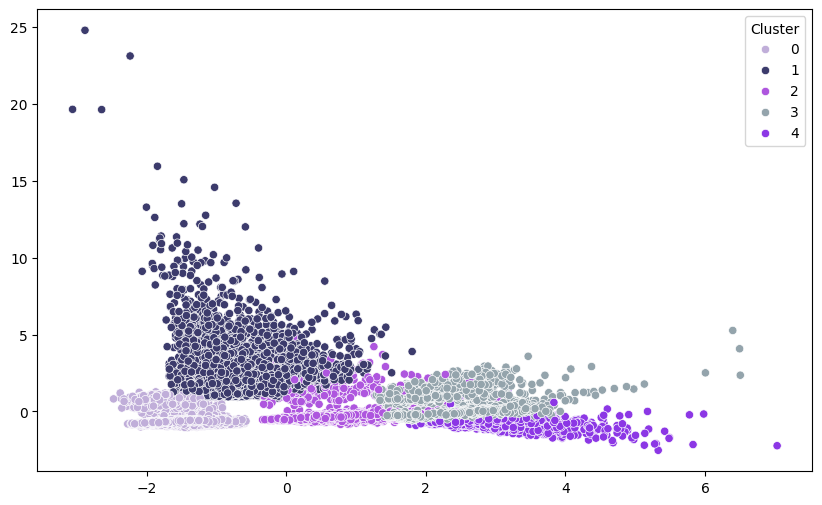

In [20]:
import seaborn as sns
from pypalettes import load_cmap
cmap = load_cmap("Amethyst")
palette = cmap.colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df_norm['Cluster'], palette=palette)

In [21]:
# from sklearn.manifold import TSNE

# tsne = TSNE(n_components=2, random_state=42)
# X_tsne = tsne.fit_transform(df_norm)
# tsne.kl_divergence_

In [22]:
# np.save(r'C:\Users\Emeline_PRO\Documents\Modules\Module_ML\ML2_Classification et Clustering\ML2.3_clustering_intro\data\X_tsne..npy', X_tsne)

In [23]:
X_tsne = np.load(r'C:\Users\Emeline_PRO\Documents\Modules\Module_ML\ML2_Classification et Clustering\ML2.3_clustering_intro\data\X_tsne..npy')

In [24]:
X_tsne

array([[ 69.02564 ,  37.384018],
       [-25.113983,  37.459618],
       [-96.19903 ,  54.17642 ],
       ...,
       [  8.733446,  37.23458 ],
       [ 51.650017, -36.930534],
       [ 38.406673,  95.41868 ]], shape=(45210, 2), dtype=float32)

C:\Users\Emeline_PRO\AppData\Local\Temp\ipykernel_13656\807524969.py:4: UserWarning: The palette list has more values (6) than needed (5), which may not be intended.
  sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_norm['Cluster'], palette=palette)


<Axes: >

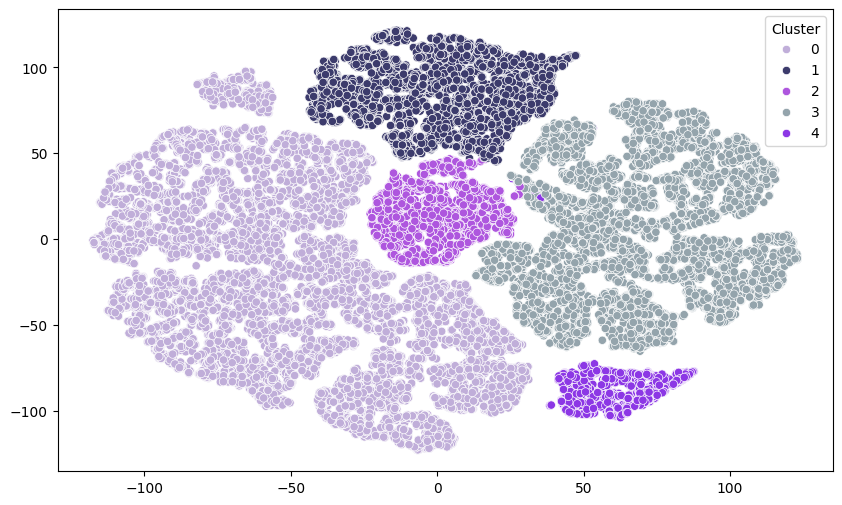

In [25]:
cmap = load_cmap("Amethyst")
palette = cmap.colors
plt.figure(figsize=(10, 6))
sns.scatterplot(x=X_tsne[:, 0], y=X_tsne[:, 1], hue=df_norm['Cluster'], palette=palette)


In [26]:
#pour annoter ici les indexs, mais on ne voit pas ici le data set ! 

# plt.figure(figsize=(10, 6))
# plt.scatter(pca_results[:, 0], # position on the first principal component of the observations
#             pca_results[:, 1], alpha=0.7) # position on the second principal component of the observations

# # Add title and axis label
# plt.title('Scatter Plot of Observations in 2D PCA Space')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')

# # (optionally) Add labels to each point based on their index in the original dataframe
# for i, txt in enumerate(df_norm.index):
#     plt.annotate(txt, (pca_results[i, 0], pca_results[i, 1]), fontsize=8)
#     # This might be useful when doing outlier detection

# # Add grid in the background
# plt.grid(True)

# # Display the chart
# plt.show()

### Evaluation

**Inertia** can be a measure of how internally coherent clusters are. It represents the within-cluster sum-of-squares.

Read more about it here:
https://scikit-learn.org/stable/modules/clustering.html#k-means 

Print the inertia obtained after the clustering.

In [27]:
kmeans.inertia_

141650.72632796742

**The silhouette score**

Make the necessary imports from scikit learn and compute the silhoutte score.

Read what this score represents and how it is computed here: https://scikit-learn.org/stable/modules/generated/sklearn.metrics.silhouette_score.html and here https://scikit-learn.org/stable/modules/clustering.html#silhouette-coefficient

In [28]:
from sklearn.metrics import silhouette_score
clusters = df_norm["Cluster"].to_numpy()
silhouette_score(df_norm, clusters)

0.4998635693833128

You can read more about other clustering evaluation methods here: https://scikit-learn.org/stable/modules/clustering.html#clustering-performance-evaluation

### Finding the optimal number of clusters

In the following article you will find several [methods](https://en.wikipedia.org/wiki/Determining_the_number_of_clusters_in_a_data_set) for determining the number of clusters.

We will first use the silhouette score for obtaining the optimal number of clusters. Optional: another method you can try is the [elbow method](https://en.wikipedia.org/wiki/Elbow_method_(clustering)) ).


**Use the silhouette analysis to find an optimal number of clusters for the bank clients data.** <u><i>Hint:</u></i> Feel free to use the `n_jobs` hyperparameter to speed up your computation.

An example of silhouette analysis is presented here: https://scikit-learn.org/stable/auto_examples/cluster/plot_kmeans_silhouette_analysis.html

Plot the silhouette scores for 20 different numbers of clusters of your choice.

In [29]:
sc = []
for n in np.arange(2,22,1):
    kmeans = KMeans(n_clusters=n, random_state=42)
    clusters = kmeans.fit_predict(df_norm)
    sc.append(silhouette_score(df_norm, clusters))

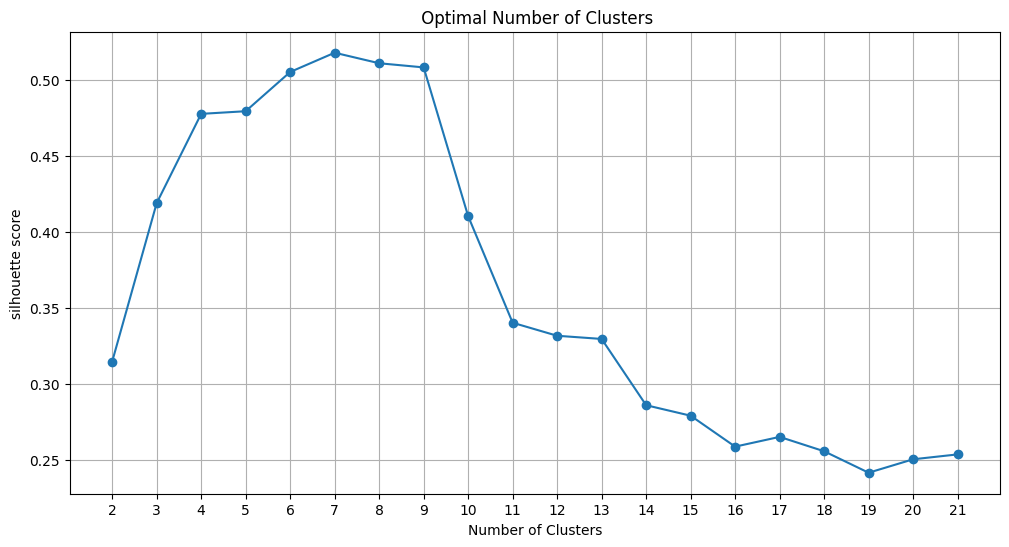

In [30]:
plt.figure(figsize=(12, 6))
plt.plot(np.arange(2,22,1), sc, marker='o')
plt.title(" Optimal Number of Clusters")
plt.xlabel("Number of Clusters")
plt.ylabel("silhouette score")
plt.xticks(np.arange(2,22,1))
plt.grid(True)
plt.show()

In [31]:
np.arange(2,22,1)

array([ 2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18,
       19, 20, 21])

c:\Users\Emeline_PRO\Documents\Modules\Module_ML\.venv\Lib\site-packages\yellowbrick\style\colors.py:35: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\Emeline_PRO\Documents\Modules\Module_ML\.venv\Lib\site-packages\setuptools\_distutils\version.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)
c:\Users\Emeline_PRO\Documents\Modules\Module_ML\.venv\Lib\site-packages\yellowbrick\style\rcmod.py:31: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  mpl_ge_150 = LooseVersion(mpl.__version__) >= "1.5.0"
c:\Users\Emeline_PRO\Documents\Modules\Module_ML\.venv\Lib\site-packages\setuptools\_distutils\version.py:336: DeprecationWarning: distutils Version classes are deprecated. Use packaging.version instead.
  other = LooseVersion(other)


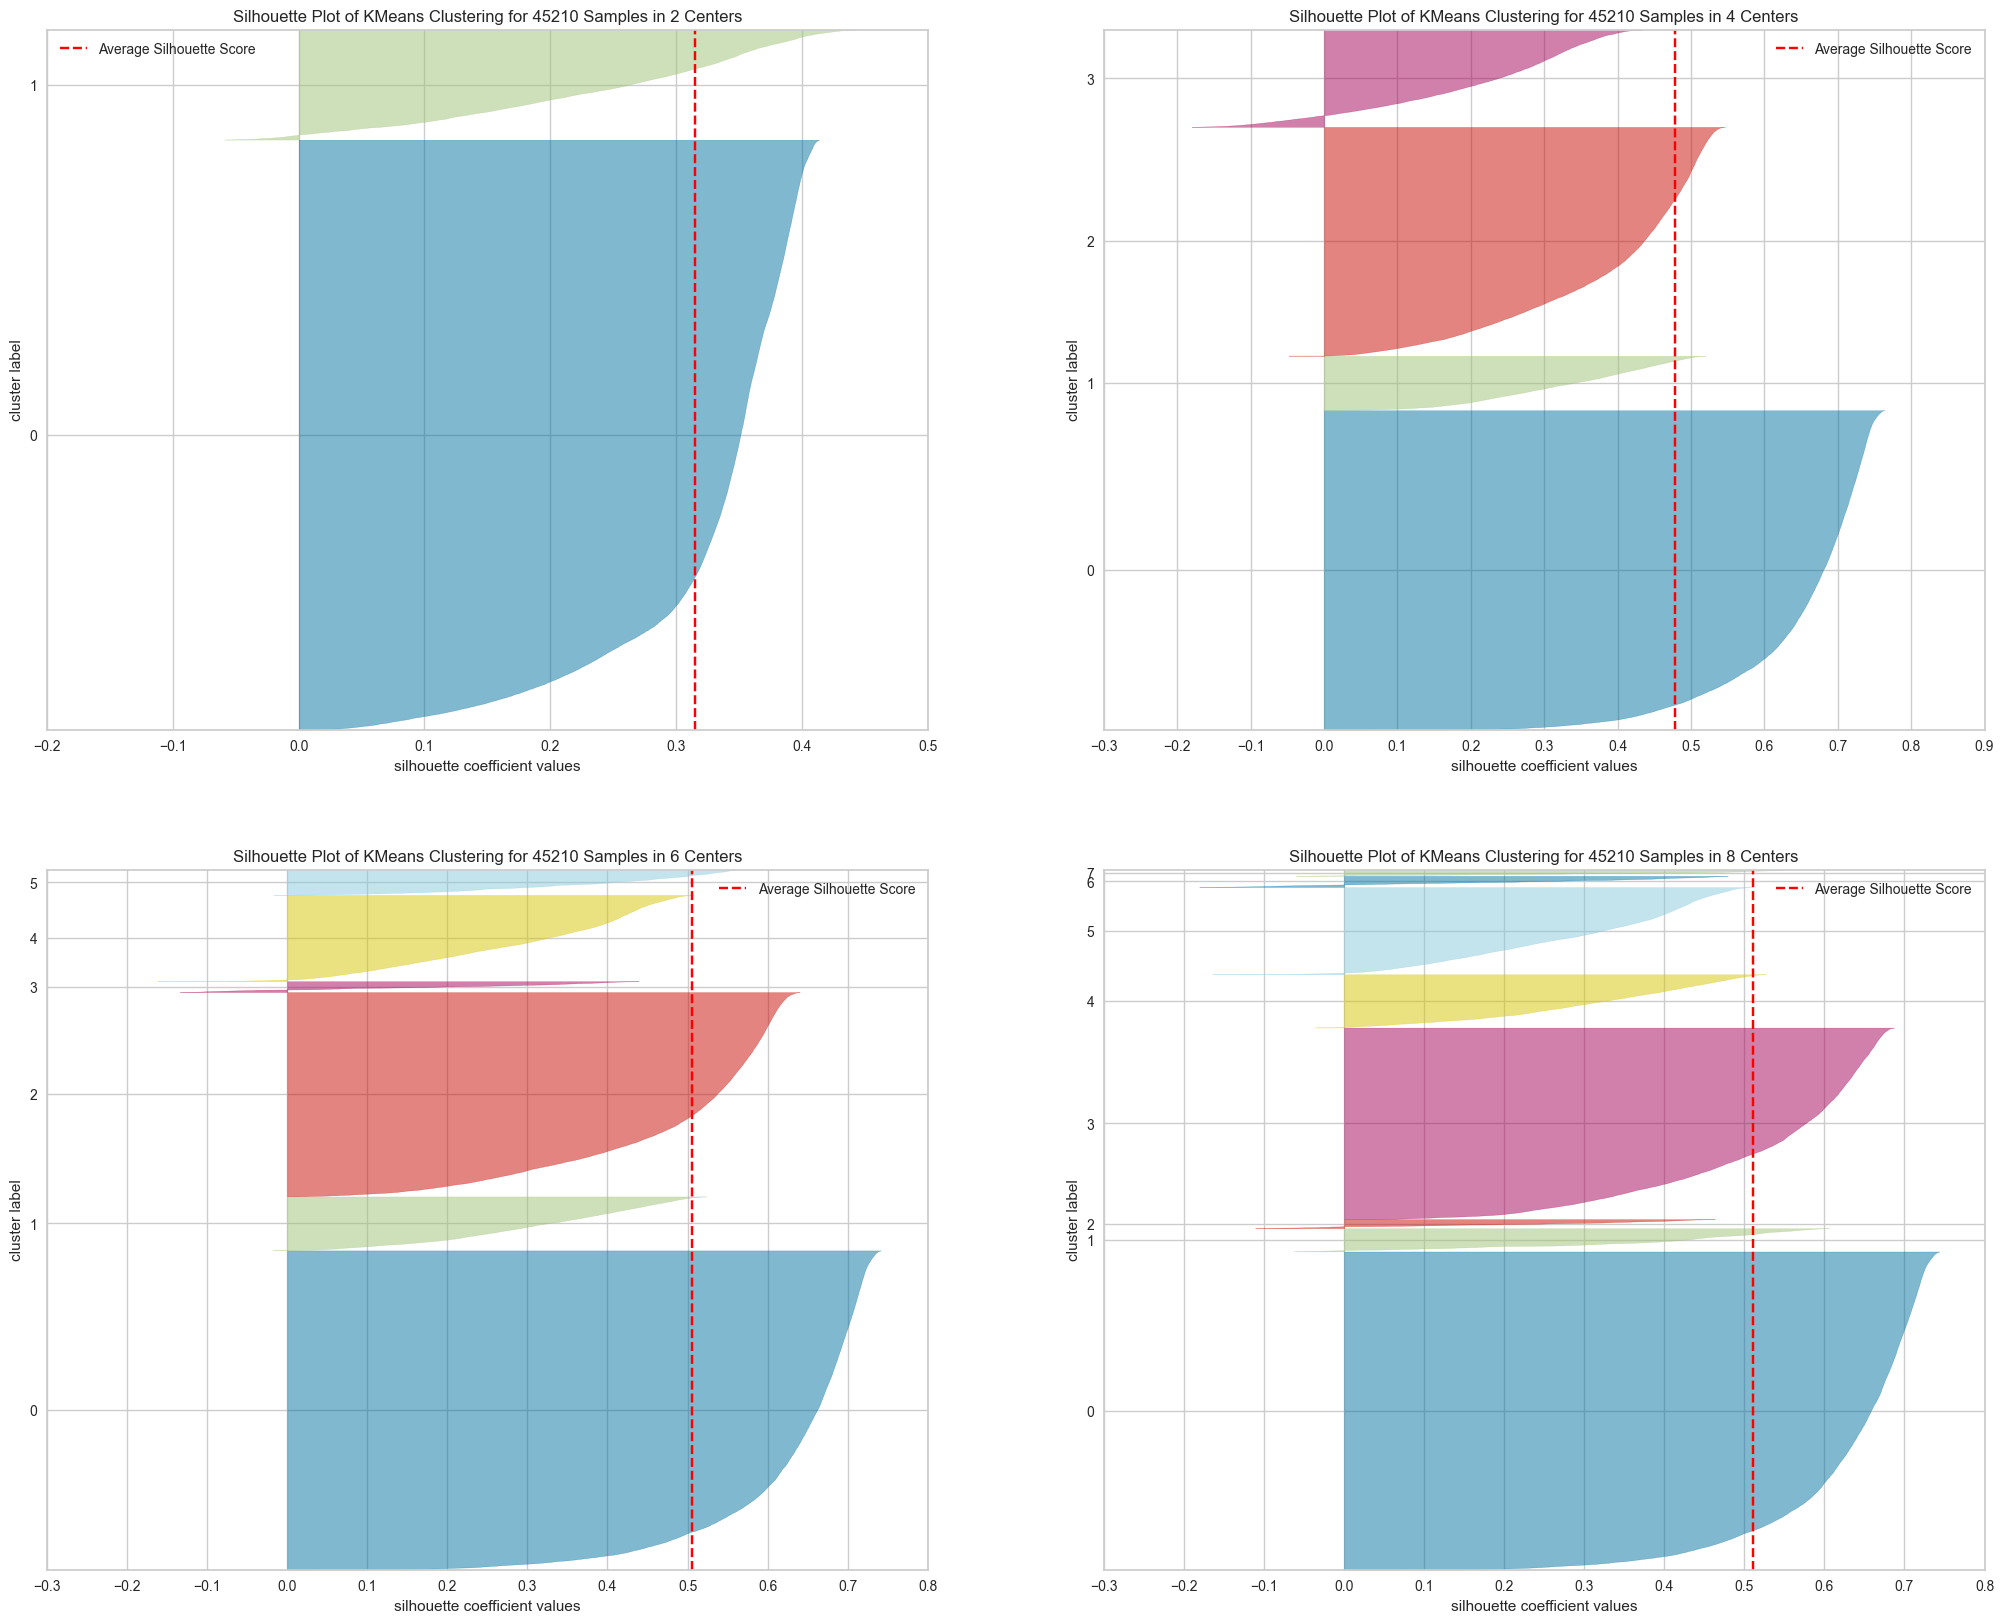

In [32]:
from sklearn.metrics import silhouette_samples, silhouette_score
from yellowbrick.cluster import SilhouetteVisualizer
fig, ax = plt.subplots(2, 2, figsize=(25,20))
axli = ax.flatten()
j = 0
for i in [ 2,4,6,8]:
  '''
    Create KMeans instance for different number of clusters
  '''
  km = KMeans(n_clusters=i,random_state=42)
  '''
  Create SilhouetteVisualizer instance with KMeans instance
  Fit the visualizer
  '''
  visualizer = SilhouetteVisualizer(km, colors='yellowbrick', 
               ax=   axli[j] )
  visualizer.fit(df_norm)
  visualizer.finalize()
  j+=1

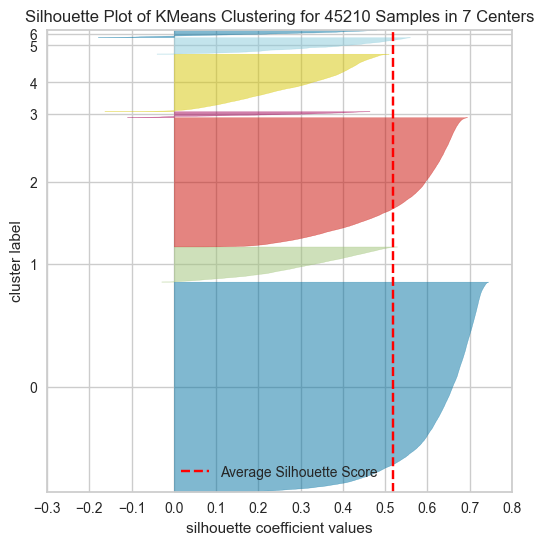

In [33]:
plt.figure(figsize=(6,6))

km = KMeans(n_clusters=7,random_state=42)
visualizer = SilhouetteVisualizer(km, colors='yellowbrick')

visualizer.fit(df_norm)
visualizer.finalize()

What is the optimal number of clusters that you obtained?

<font color='mediumorchid'> D'après la courbe, on atteint un max de SC pour un nombre de cluster de 7. Mais quand on plot, les silhouettes scores ne sont pas terribles (il y a des groupes très écrasés et très petits) et il y a plusieurs groupes avec valeurs négatives. Si on parle des profils client en banque, c'est peut être trop de groupes ? On voit qu'il y a un premier petit plateau à 4-5 clusters. Le profil des silhouettes scores sembles d'ailleurs plus optimal dans la forme et la distribution, il reste quelques individus non classables  </font>

## Hierarchical Clustering

Let's try to apply now a different method on the same data. You can find more explanations on hierarchical clustering in the links in section Resources D. Hierarhchical clustering:
 * https://www.youtube.com/watch?v=QXOkPvFM6NU&t=1s (from minute 11:34 onwards)
 * https://stackabuse.com/hierarchical-clustering-with-python-and-scikit-learn/ (example on how to do hierarchical clustering with scikit-learn)
 * https://scikit-learn.org/stable/modules/clustering.html#hierarchical-clustering

Make the necessary imports from scikit learn to perform hierarchical clustering. 

Start by plotting the dendrogram and deciding the number of clusters. Then apply hierarchical clustering.

You might find this useful: https://docs.scipy.org/doc/scipy/reference/cluster.hierarchy.html for creating the dendrogram.

In [34]:
from sklearn.cluster import AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage

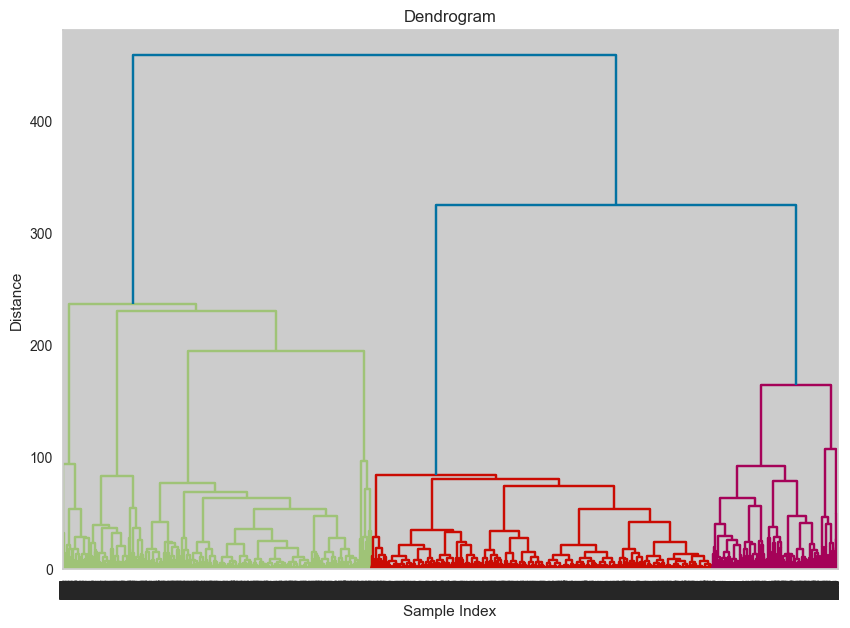

In [35]:
# Generate the linkage matrix
Z = linkage(df_norm, method='ward')

# Plot the dendrogram
plt.figure(figsize=(10, 7))
dendrogram(Z)
plt.title('Dendrogram')
plt.xlabel('Sample Index')
plt.ylabel('Distance')
plt.show()

How many clusters did you find?

<font color= 'mediumorchid'> Plutôt 3 clusters, on pourrait aussi retrouver 7</font>

Compare the kmeans labels with the labels obtained by the hierarchical clustering.

In [36]:
agg_clustering = AgglomerativeClustering(n_clusters=3)
df_norm["Cluster_hier"] = agg_clustering.fit_predict(df_norm)
df_norm["Cluster_hier"] = df_norm["Cluster_hier"].astype("category")

df_norm.sample(10)

,age,balance,duration,campaign,pdays,previous,Cluster,Cluster_hier
39799,1.512772,-0.023086,-0.416115,-0.569350,0.287716,0.223149,3,0
27290,0.194351,-0.476323,-0.637451,-0.246563,-0.411422,-0.300986,0,2
27555,-0.653205,0.417343,1.735112,1.044585,-0.411422,-0.300986,2,0
11102,-1.218243,-0.609338,-0.513192,0.399011,-0.411422,-0.300986,0,2
36314,1.041908,-0.447421,0.275073,-0.246563,-0.411422,-0.300986,3,0
27549,-0.370686,-0.328200,-0.851020,0.399011,1.416324,1.271418,1,1
27808,-1.218243,-0.414249,-0.652983,-0.569350,-0.411422,-0.300986,0,2
8989,-0.276514,-0.447421,-0.785008,-0.569350,-0.411422,-0.300986,0,2
13751,0.476870,-0.375822,-0.843254,-0.569350,-0.411422,-0.300986,3,0
17403,-0.559032,-0.654662,-0.520958,0.076224,-0.411422,-0.300986,0,2


In [37]:
clusters_agg = df_norm["Cluster_hier"].to_numpy()

In [38]:
kmeans = KMeans(n_clusters=4, random_state=42)
df_norm["Cluster"] = kmeans.fit_predict(df_norm)
df_norm["Cluster"] = df_norm["Cluster"].astype("category")

clusters = df_norm["Cluster"].to_numpy()

df_norm.sample(10)

,age,balance,duration,campaign,pdays,previous,Cluster,Cluster_hier
41412,2.925367,1.588534,1.059456,-0.569350,-0.411422,-0.300986,1,0
41075,-1.971627,-0.378450,-0.610269,-0.569350,-0.411422,-0.300986,0,2
16192,-1.312416,-0.348891,-0.190896,-0.246563,-0.411422,-0.300986,0,2
5091,0.476870,-0.732172,-0.140416,0.721798,-0.411422,-0.300986,1,0
32515,0.288524,-0.188616,0.519707,-0.569350,-0.411422,-0.300986,0,2
44856,-1.500762,0.834124,2.321457,-0.569350,-0.411422,-0.300986,1,0
18110,0.853562,-0.316704,5.082328,0.721798,-0.411422,-0.300986,1,0
28350,-0.841551,-0.447421,-0.629685,-0.569350,-0.411422,-0.300986,0,2
16537,0.947735,6.961037,-0.726762,0.076224,-0.411422,-0.300986,1,0
20745,-0.464859,-0.428043,1.040040,-0.246563,-0.411422,-0.300986,0,2


C:\Users\Emeline_PRO\AppData\Local\Temp\ipykernel_13656\1907204714.py:8: UserWarning: The palette list has more values (6) than needed (3), which may not be intended.
  sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df_norm['Cluster_hier'], palette=palette)
C:\Users\Emeline_PRO\AppData\Local\Temp\ipykernel_13656\1907204714.py:12: UserWarning: The palette list has more values (6) than needed (4), which may not be intended.
  sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df_norm['Cluster'], palette=palette)


Text(0.5, 1.0, 'Kmeans clustering ')

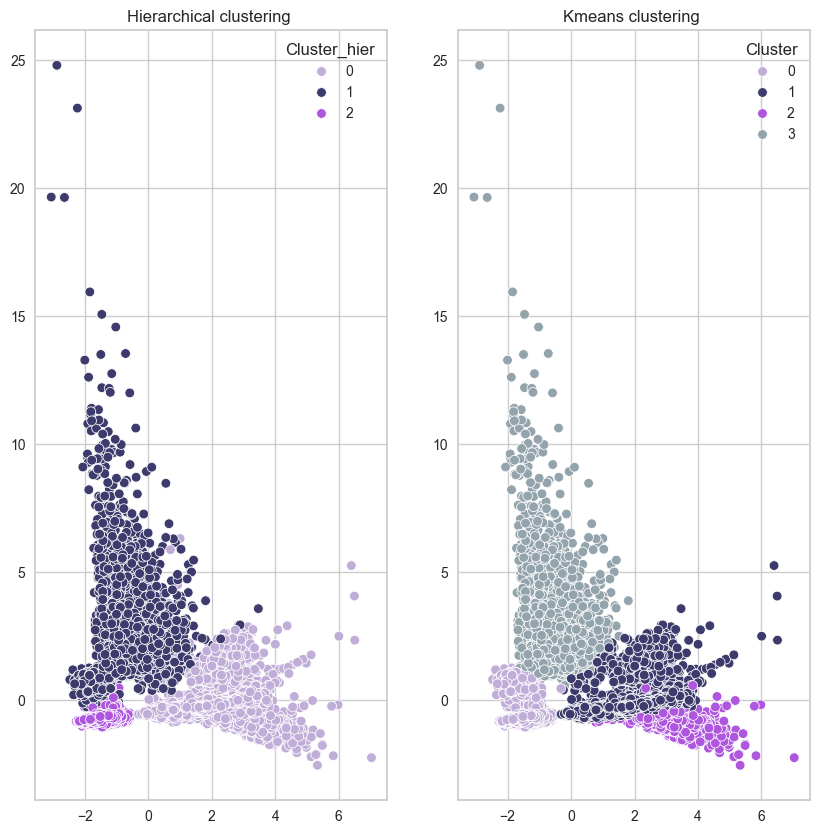

In [39]:
import seaborn as sns
from pypalettes import load_cmap
cmap = load_cmap("Amethyst")
palette = cmap.colors
plt.figure(figsize=(10, 10))

plt.subplot(1,2, 1)
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df_norm['Cluster_hier'], palette=palette)
plt.title ('Hierarchical clustering ')

plt.subplot(1,2, 2)
sns.scatterplot(x=pca_2d[:, 0], y=pca_2d[:, 1], hue=df_norm['Cluster'], palette=palette)
plt.title ('Kmeans clustering ')


In [40]:
from sklearn.metrics import calinski_harabasz_score, davies_bouldin_score

silhouette_km = silhouette_score(df_norm, clusters)
davies_km = davies_bouldin_score(df_norm, clusters)


silhouette_hc = silhouette_score(df_norm, clusters_agg)
davies_hc = davies_bouldin_score(df_norm, clusters_agg)


print("--- Comparaison des Modèles de Clustering ---")
print(f"Nombre de clusters (k) = 3\n")
print(f"{'Métrique':<25} | {'K-Means':<15} | {'Hiérarchique':<15}")
print("-" * 60)
print(f"{'Score de Silhouette':<25} | {silhouette_km:<15.3f} | {silhouette_hc:<15.3f}")
print(f"{'Indice Davies-Bouldin':<25} | {davies_km:<15.3f} | {davies_hc:<15.3f}")
print("-" * 60)


--- Comparaison des Modèles de Clustering ---
Nombre de clusters (k) = 3

Métrique                  | K-Means         | Hiérarchique   
------------------------------------------------------------
Score de Silhouette       | 0.447           | 0.408          
Indice Davies-Bouldin     | 0.979           | 1.172          
------------------------------------------------------------


<font color='mediumorchid'> Les deux modèles semblent relativement équivalents avec un score de silhouette très légèrement supérieur pour le K-means (mais quand même pas très bon) </font>

### Application: clustering images

Theses techniques can be use to reduce the number of colours in a picture

- find a picture you want to reduce the number of colours.
- use `skimages` and `sklearn` to reduce the number of colours in this picture
- from your picture create two pictures with 16 colours what do you notice?

In [ ]:
import skimage as ski 
from skimage import io
import numpy as np
import matplotlib.pyplot as plt 

In [ ]:
image = io.imread(r'C:\Users\Emeline_PRO\Documents\Modules\Module_ML\ML2_Classification et Clustering\ML2.3_clustering_intro\data\littleone-atelier-123.jpg')

In [ ]:
image.shape

(3992, 6000, 3)

In [ ]:
w, h, d = image.shape
image_array = np.reshape(image, (w * h, d)) # (pixels, couleurs)

In [ ]:
image_array.shape

(23952000, 3)

In [ ]:
n_colors = 16

from sklearn.cluster import KMeans

model = KMeans(n_clusters=n_colors, random_state=42)
model.fit(image_array)
labels_kmeans = model.predict(image_array)

In [ ]:
centroids = model.cluster_centers_
centroids

array([[164.90495725, 143.77724995, 123.16549911],
       [102.32877678,  79.8801531 ,  50.34266227],
       [143.47481453, 115.60419764,  86.65079042],
       [189.71478358, 172.90246003, 159.3815224 ],
       [198.35532274, 143.19290564, 116.39193609],
       [186.72589563, 128.79352164,  97.44883221],
       [ 48.3384947 ,  26.07198434,   7.30784425],
       [181.41567486, 161.98394425, 144.65840688],
       [154.23189769, 131.07671937, 107.70228019],
       [ 79.54681174,  62.12017331,  37.33953661],
       [152.31267628, 101.78495072,  61.9921898 ],
       [129.1392189 ,  98.27065739,  64.05757832],
       [174.06092736, 153.44241625, 133.94973766],
       [104.84849719,  60.99918182,  20.09095907],
       [127.93180451,  83.29997939,  40.63596856],
       [171.71924551, 115.08460496,  80.08151656]])

In [ ]:
image_kmeans_16_flat = centroids[labels_kmeans]
image_kmeans_16 = np.reshape(image_kmeans_16_flat, image.shape)

In [ ]:
image_kmeans_16_uint8 = (image_kmeans_16 * 255).astype(np.uint8)
io.imsave('image_16_couleurs_KMeans.png', image_kmeans_16_uint8)

Now let's try to apply KMeans clustering on the simple digits data that can be loaded from sklearn (https://scikit-learn.org/stable/modules/generated/sklearn.datasets.load_digits.html)

The goal is to use KMeans to try to identify similar digits without using the original label information.

Start by loading the digits and then finding the KMeans clusters. The digits data consists of 1,797 samples with 64 features, where each of the 64 features is the brightness of one pixel in an 8×8 image.

In [ ]:
from sklearn.datasets import load_digits

digits = load_digits().data

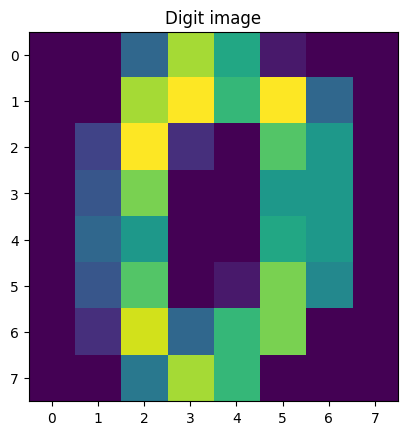

array([ 0.,  0.,  5., 13.,  9.,  1.,  0.,  0.,  0.,  0., 13., 15., 10.,
       15.,  5.,  0.,  0.,  3., 15.,  2.,  0., 11.,  8.,  0.,  0.,  4.,
       12.,  0.,  0.,  8.,  8.,  0.,  0.,  5.,  8.,  0.,  0.,  9.,  8.,
        0.,  0.,  4., 11.,  0.,  1., 12.,  7.,  0.,  0.,  2., 14.,  5.,
       10., 12.,  0.,  0.,  0.,  0.,  6., 13., 10.,  0.,  0.,  0.])

In [ ]:
# an array of color values of pixels of its image
# first digit looks like 
sample_digit = digits[0].reshape(8, 8)
plt.imshow(sample_digit)
plt.title("Digit image")
plt.show()

digits[0]

In [ ]:
def elbow_method(scale, df_norm): 


    ''' compute inertia for a given range of cluster 
    plot the curve 
    
    Args:
        range : of clusters 
        df_norm : data set scaled 
        '''
    
    inertia = []
    for n in scale:
        kmeans = KMeans(n_clusters=n, random_state=42)
        kmeans.fit(df_norm)
        inertia.append(kmeans.inertia_)

    plt.figure(figsize=(12, 6))
    plt.plot(scale, inertia, marker='o')
    plt.title("Elbow Method for Optimal Number of Clusters")
    plt.xlabel("Number of Clusters")
    plt.ylabel("Inertia")
    plt.xticks(scale)
    plt.grid(True)
    plt.show()

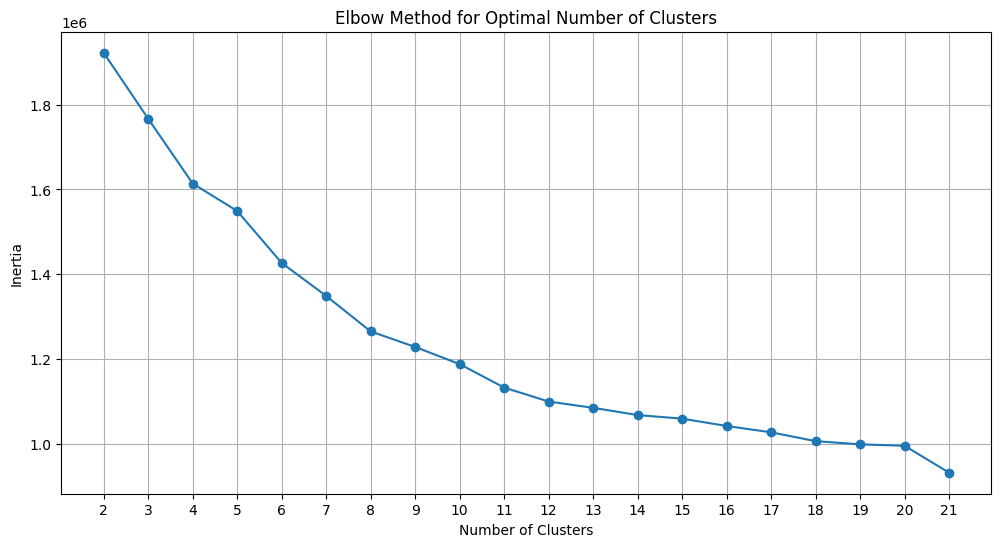

In [ ]:
elbow_method(range(2,22), digits)

In [ ]:
model_kmeans = KMeans(n_clusters=10, random_state=42)
model_kmeans.fit(digits)
labels = model_kmeans.predict(digits)
labels

array([5, 7, 7, ..., 8, 9, 8], shape=(1797,), dtype=int32)

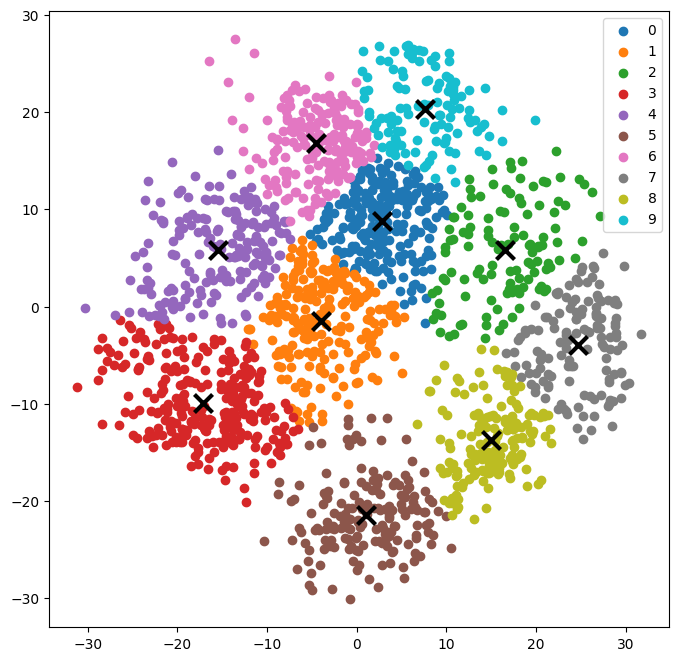

In [ ]:
# Avec une PCA 

from sklearn.decomposition import PCA
pca = PCA(2)
reduced_data = pca.fit_transform(digits)
model_kmeans.fit(reduced_data)

# Calculating the centroids
centroids = model_kmeans.cluster_centers_
label = model_kmeans.fit_predict(reduced_data)
unique_labels = np.unique(label)

# plotting the clusters:
plt.figure(figsize=(8, 8))
for i in unique_labels:
    plt.scatter(reduced_data[label == i, 0],
                reduced_data[label == i, 1],
                label=i)
plt.scatter(centroids[:, 0], centroids[:, 1],
            marker='x', s=169, linewidths=3,
            color='k', zorder=10)
plt.legend()
plt.show()

The cluster centroids themselves are 64-dimensional points, and can thus be interpreted as the "typical" digit within the cluster. Plot each cluster center. Hint: use *imshow*

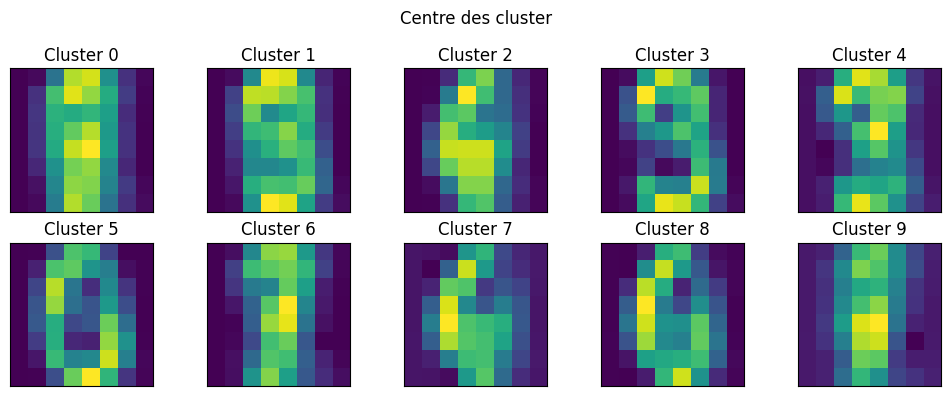

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

centroids_64d = pca.inverse_transform(model_kmeans.cluster_centers_)
fig, axes = plt.subplots(2, 5, figsize=(10, 4)) 
axes = axes.flatten() 

for i, center in enumerate(centroids_64d ):
    center_image = center.reshape(8, 8)
    axes[i].imshow(center_image) 
    axes[i].set_title(f'Cluster {i}')
    axes[i].set_xticks([])
    axes[i].set_yticks([])

plt.suptitle("Centre des cluster")
plt.tight_layout()
plt.show()

Now compute the accuracy score between the true labels from the data and the predicted ones.

In [45]:
# code here

Plot the confusion matrix between the predicted labels and the actual labels. Which were the digits that were most often confused with other digits?

In [46]:
# code here

What if instead of keeping the original 64 features, we perform a projection into 2 dimensions?
Use the t-distributed stochastic neighbor embedding (t-SNE) algorithm to pre-process the data before performing KMeans. t-SNE is a nonlinear embedding algorithm that is particularly adept at preserving points within clusters.

Compute the new accuracy.

In [47]:
# code here